In [1]:
# !pip install git+https://github.com/rcmalli/keras-vggface
# !pip install keras_applications
# !pip install mtcnn

In [2]:
import tensorflow as tf
import keras
import keras_vggface
from keras_vggface.vggface import VGGFace
import mtcnn
import numpy as np
import matplotlib as mpl
from keras.utils.data_utils import get_file
import keras_vggface.utils
import PIL
import os
import os.path

In [3]:
vggface = VGGFace(model='vgg16')
vggface_resnet = VGGFace(model='resnet50')
vggface_senet = VGGFace(model='senet50')

In [4]:
print (vggface.summary())
print( 'Inputs: ',vggface.inputs)
print( 'Outputs:', vggface.outputs)

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [5]:
# !mkdir public images
# !wget -O public images/scalia.jpg 'https://upload.wikimedia.org/wikipedia/commons/c/c5/Antonin_Scalia_Official_SCOTUS_Portrait.jpg'

In [6]:
# load image from file
import matplotlib as mpl
import matplotlib.image as img

scalia_photo = img.imread('public_images/scalia.jpg')
scalia_photo.shape
face_detector = mtcnn.MTCNN()
face_roi = face_detector.detect_faces(scalia_photo)

1/1 [==============================] - 0s 253ms/step


In [7]:
face_roi

[{'box': [255, 118, 143, 184],
  'confidence': 0.9984273910522461,
  'keypoints': {'left_eye': (283, 197),
   'right_eye': (344, 187),
   'nose': (304, 230),
   'mouth_left': (294, 259),
   'mouth_right': (355, 248)}}]

In [8]:
# extract the bounding box from the first face
x1, y1, width, height = face_roi[0]['box']
x2, y2 = x1 + width, y1 + height
face = scalia_photo[y1:y2, x1:x2]
print (face.shape)

(184, 143, 3)


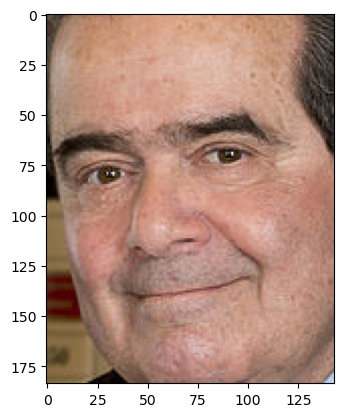

In [9]:
import matplotlib.pyplot

# f, (ax1, ax2) = mpl.pyplot.subplots(1,2, figsize=(5,3))
# ax1.scatter(mpl.pyplot.imshow(scalia_photo))
# ax1.set(title="2012 Precipitation Data")

# ax2.scatter(mpl.pyplot.imshow(face))
# ax2.set(title="2013 Precipitation Data")

# mpl.pyplot.subplots_adjust(hspace=0.4)

# mpl.pyplot.show()

# mpl.pyplot.imshow(scalia_photo)
mpl.pyplot.imshow(face)
mpl.pyplot.show()

In [12]:
# predictions = vggface_resnet.predict(samples)

In [ ]:
# predictions, predictions.shape

In [13]:
# names = keras_vggface.utils.decode_predictions(predictions)

In [16]:
train_dataset = keras.utils.image_dataset_from_directory('pubfig/train', shuffle=True, batch_size=8, image_size(224,224))

SyntaxError: positional argument follows keyword argument (47546515.py, line 1)

In [ ]:
data augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.2),
]